# Testing HotVis on the flights paths

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd
import numpy as np

In [2]:

def split_path_data(data: pp.PathData, training_percentile: float):
    training_data = pp.PathData(data.mapping)
    test_data = pp.PathData(data.mapping)
    split_indices = torch.rand(data.num_paths)
    for i in range(data.num_paths):
        if split_indices[i] <= training_percentile:
            training_data.append_walk(data.get_walk(i))
        else:
            test_data.append_walk(data.get_walk(i))
    return training_data, test_data


In [3]:
def from_ngram(file: str, sep: str = ",") -> pp.PathData:
    with open(file, "r", encoding="utf-8") as f:
        paths = [line.strip().split(sep) for line in f if len(line.strip().split(sep)) > 1]
        
    weights = [1.0] * len(paths)

    mapping = pp.IndexMap()
    mapping.add_ids(np.concatenate([np.array(path) for path in paths]))

    pathdata = pp.PathData(mapping)
    pathdata.append_walks(node_seqs=paths, weights=weights)

    return pathdata

In [4]:
# load flights
flights = from_ngram("graphs/Flights/flights.ngram")
#flights, flights = split_path_data(flights, 0.7)

In [5]:
print(flights.get_walk(0))

('ABQ', 'BWI', 'STL', 'ABQ')


In [6]:
layout_2 = HotVis(flights, 2, 50000, 1, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(flights, 3, 50000, 1, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(flights, 5, 50000, 1, alpha=[1, 0.5, 0.3, 0.25, 0.2], force=10)

100%|██████████| 50000/50000 [00:26<00:00, 1882.37it/s]


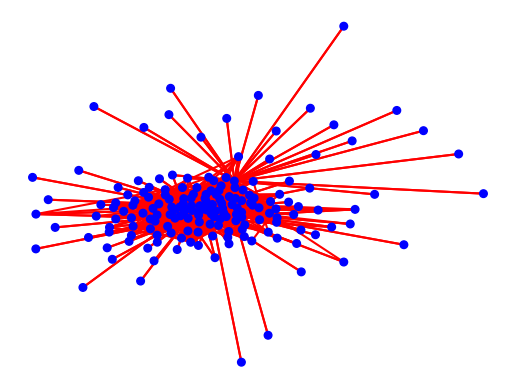

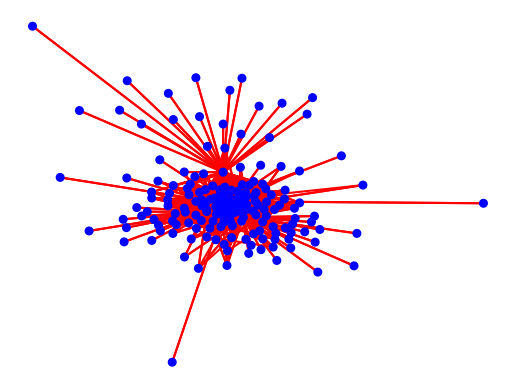

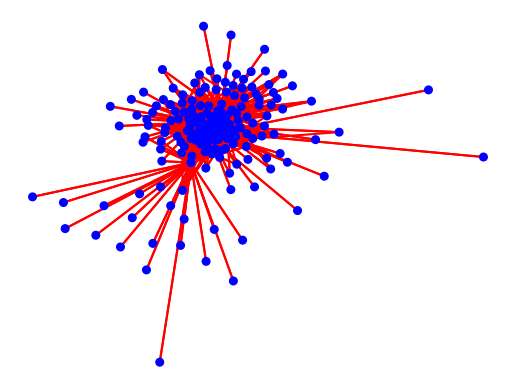

In [7]:
graph = pp.MultiOrderModel.from_PathData(flights, max_order=1).layers[1]
pp.plot(graph, layout=layout_2, backend='matplotlib')
pp.plot(graph, layout=layout_3, backend='matplotlib')
pp.plot(graph, layout=layout_5, backend='matplotlib')

In [8]:
print(edge_crossing(flights, layout_2))
print(edge_crossing(flights, layout_3))
print(edge_crossing(flights, layout_5))

77449


KeyboardInterrupt: 

In [ ]:
print(causal_path_dispersion(flights, layout_2, 3))
print(causal_path_dispersion(flights, layout_3, 3))
print(causal_path_dispersion(flights, layout_5, 3))

tensor(1.1964, dtype=torch.float64)


KeyboardInterrupt: 

In [9]:
print(closeness_eccentricity(flights, layout_2, 3, 0.1))
print(closeness_eccentricity(flights, layout_3, 3, 0.1))
print(closeness_eccentricity(flights, layout_5, 3, 0.1))

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:234: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path))


tensor(0.3281, dtype=torch.float64)


KeyboardInterrupt: 